In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df =pd.read_csv("Mall.csv")

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
from sklearn.cluster import KMeans

In [8]:
wcss = [] 

In [11]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init="k-means++")
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
            

C:\Users\PRETHIVEE RAJAN\anaconda32021\envs\webapp\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


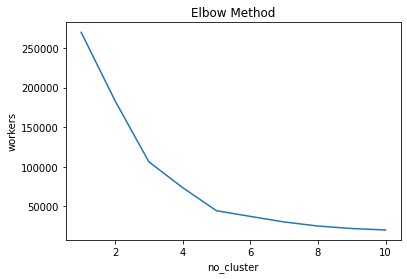

In [25]:
plt.plot(range(1,11),wcss)
plt.xlabel("no_cluster")
plt.ylabel("workers")
plt.title("Elbow Method")
plt.show()

In [23]:
km = KMeans(n_clusters=5)

In [26]:
km.fit(df.iloc[:,3:])
y_pred = km.predict(df.iloc[:,3:])
print(y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [33]:
df["cluster"] = y_pred
df0= df[df["cluster"]==0]
df1 = df[df["cluster"]==1]
df2= df[df["cluster"]==2]
df3= df[df["cluster"]==3]
df4= df[df["cluster"]==4]

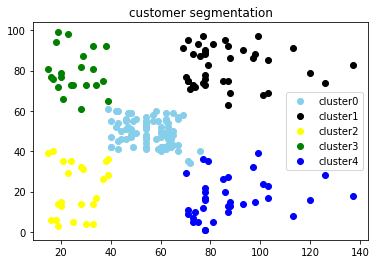

In [41]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color = "skyblue",label = "cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color = "black",label = "cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color = "yellow",label = "cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color = "green",label = "cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color = "blue",label = "cluster4")
plt.legend()
plt.title("customer segmentation")
plt.show()
